<a href="https://colab.research.google.com/github/Pramanik4/Anomalies_Detection_Project/blob/main/Analysis_on_Anomalies_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imported all the required libraries**

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
import plotly.express as px


# **Loaded the dataset using Pandas Library**

In [ ]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,date_time,src_ip,dest_ip,site,url,webapp_host,attack_type,http_method,action,Country,Forwarded_IP,X-ORIGINAL-HOST,X-Original-URL
0,10/4/2023 09:55,49.47.241.155,192.86.98.102,192.86.98.102,192.86.98.102:443/,boomerangprod.worldbank.org,NaN,POST,passed,India,49.47.241.155,NaN,NaN
1,10/4/2023 09:55,10.168.238.7,10.168.233.21,10.168.233.21,10.168.233.21:5036/images/donation/24hrs-org.png,intranet.worldbank.org,NaN,GET,passed,NaN,138.220.110.143,intranet.worldbank.org,/images/donation/24hrs-org.png
2,10/4/2023 09:55,160.120.189.141,192.86.98.29,192.86.98.29,192.86.98.29:443/secure/common/userpreferences...,ebizprd.worldbank.org,NaN,GET,passed,Ivory Coast,160.120.189.141,NaN,NaN
3,10/4/2023 09:55,10.168.238.5,10.168.233.21,10.168.233.21,10.168.233.21:5033/api/yammer/getdata,skillfinderapi.ase.worldbank.org,NaN,OPTIONS,passed,NaN,192.86.106.32,peopleapi.worldbank.org,/api/yammer/getdata?key=1661606924&type=userid
4,10/4/2023 09:55,10.168.238.7,10.168.233.21,10.168.233.21,10.168.233.21:5049/api/enterprise-search/gc/v1...,intranetsearchapi.worldbank.org,NaN,POST,passed,NaN,134.238.248.19,intranetsearchapi.worldbank.org,/api/enterprise-search/gc/v1/orderedresult


# **Total Rows and Columns**

In [ ]:
dataset.shape

(34555, 13)

Total Rows : 34555 Total Columns : 24

# **Attributes Data Types**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34555 entries, 0 to 34554
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_time        34555 non-null  object
 1   src_ip           34552 non-null  object
 2   dest_ip          34555 non-null  object
 3   site             34555 non-null  object
 4   url              34551 non-null  object
 5   webapp_host      34102 non-null  object
 6   attack_type      4733 non-null   object
 7   http_method      34168 non-null  object
 8   action           34551 non-null  object
 9   Country          5837 non-null   object
 10  Forwarded_IP     28777 non-null  object
 11  X-ORIGINAL-HOST  18095 non-null  object
 12  X-Original-URL   18095 non-null  object
dtypes: object(13)
memory usage: 3.4+ MB


# **Unique values in each Column**

In [ ]:
dataset.nunique()

date_time            19
src_ip             1409
dest_ip             106
site                107
url                9789
webapp_host         869
attack_type          17
http_method           5
action                3
Country             123
Forwarded_IP       3554
X-ORIGINAL-HOST      75
X-Original-URL     6927
dtype: int64

Here it is unique values count of each attributes

# **Drop Off Duplicates Values**

In [ ]:
dataset.duplicated().sum()

5385

In [ ]:
dataset.drop_duplicates(inplace=True)

Here, we have removed all the duplicates values from this data

# **Total No. of Missing values**

In [ ]:
dataset.isnull().sum()

date_time              0
src_ip                 3
dest_ip                0
site                   0
url                    4
webapp_host           59
attack_type        25105
http_method           27
action                 4
Country            25104
Forwarded_IP        5075
X-ORIGINAL-HOST    12837
X-Original-URL     12837
dtype: int64

# **Remove Null value (Forwarded_IP)**

In [ ]:
dataset = dataset.dropna(subset=['Forwarded_IP'])

<Axes: >

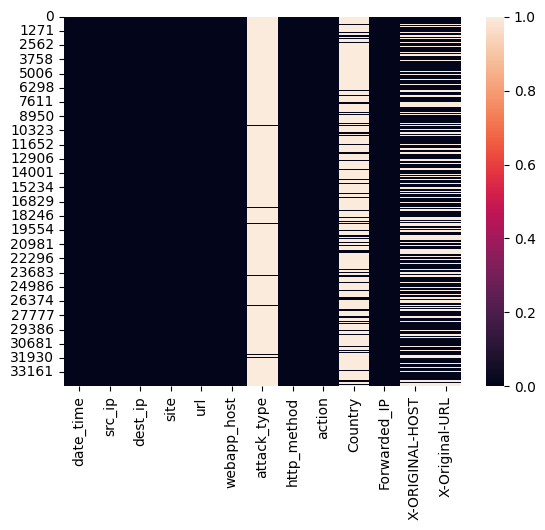

In [ ]:
sb.heatmap(dataset.isnull())

The code will remove the missing value

# **let's see Unique no. of Forwarded IP**

In [ ]:
dataset['Forwarded_IP'].nunique()

3554

# **Total Websites**

In [ ]:
dataset['webapp_host'].nunique()

286

# **Segregate IP into Internal & External**

In [ ]:
def ip_types(Forwarded_IP):
    if Forwarded_IP.startswith('164.114.') or Forwarded_IP.startswith('138.220.'):
        return 'Internal'
    else:
        return 'External'

dataset['IP_types'] = dataset['Forwarded_IP'].apply(ip_types)

# **Scatter Plot on Internal & External IPs**

In [ ]:
import plotly.express as px
fig = px.scatter(dataset, x='Forwarded_IP', y='webapp_host',color='IP_types')

# Show the plot
fig.show()

We can observer that around 20% is Internal IP and 80% are External IP which is hitting our Websites.

# **Most Attack on Which Website**

In [ ]:
dataset['attack_type'].value_counts().head()

Buffer Overflow               287
HTTP Parser Attack            134
Forceful Browsing              31
Detection Evasion              23
Server Side Code Injection     11
Name: attack_type, dtype: int64

In [ ]:
attack_types_counts = dataset.groupby('webapp_host')['attack_type'].value_counts().unstack(fill_value=0)
fig = px.line(attack_types_counts, x=attack_types_counts.index, y=attack_types_counts.columns, title='Attacks on Websites')
fig.show()


From the above pictorial line chart, it is dipicting which are the most attack type in happening in our website.

# **Which Website is Accessed the most**

In [ ]:
dataset['http_method'].value_counts()

GET        18436
POST        3328
OPTIONS     2255
HEAD          54
PUT           19
Name: http_method, dtype: int64

In [ ]:
custom_colors = {
    'GET': 'red',
    'POST': 'green',
    'OPTIONs': 'blue',
    'HEAD': 'orange',
    'PUT': 'purple'
}
get_counts = dataset.groupby(['webapp_host', 'http_method']).size().unstack(fill_value=0)
fig = px.line(get_counts, x=get_counts.index, y=get_counts.columns, title='HTTP Method on Websites',color='http_method',color_discrete_map=custom_colors)
fig.show()


**We have plots this to know that which website is getting the access request.**

# **Action Types**

In [ ]:
custom_colors = {
    'alerted': 'blue',
   'blocked': 'red',
  'passed': 'green',
 }
get_counts = dataset.groupby(['webapp_host', 'action']).size().unstack(fill_value=0)

# Create a line chart for all methods
fig = px.line(get_counts, x=get_counts.index, y=get_counts.columns, title='Action on Websites',color='action',color_discrete_map=custom_colors)

# Show the plot
fig.show()


**It's crtstal and clear that most of the action on our website are passed which is Green in color and alert action is less compare to blocked action. With this data than further if required we can check for the alerted action. So from here we can gathered that on which all website we got alerted action and what's the reason behind it.**

  # Analysis on Data

**=> Around 20% is our IP (Internal IP) which is hitting our Website (Total website is 236).**

**=> Top 5 Attack on our Website are :**

                  

*   **Buffer Overflow**
*   **HTTP Parser Attack**

*   **Forceful Browsing**
*   **Detection Evasion**

*  **Server Side Code Injection**

**NOTE : It is displaying on which website which attack is happening the most.**

**=> It's list out that which all of our website is getting more access request and other kinds of request too.**

**=> There is nothing to worry on action part in our website because we make out that most are passed but if required we can dig into alerted & blocked action.**



**Objective was to detect any if Anomalies in this data but we didn't detect anything suspicious.**







